## Stack Plot
    - Stack plot visualizes data in stacks and shows the distribution of data over time.
    - When to use: It is used for checking multiple variable area plots in a single plot.
    - Eg: It is useful in understanding the change of distribution in multiple variables over an interval.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np_data= pd.read_csv('datasets/national_parks.csv')

In [2]:
np_data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


    - As stack plot requires stacking, it is done in using np.vstack()


In [3]:
x = np_data['Year']
y = np.vstack([np_data['Badlands'], 
               np_data['GrandCanyon'], 
               np_data['BryceCanyon']])

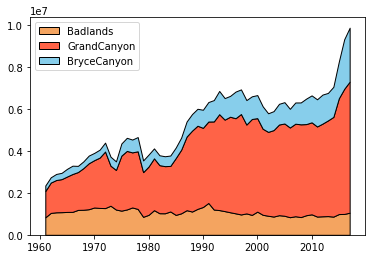

In [4]:
# Labels for each stack
labels = ['Badlands', 
          'GrandCanyon', 
          'BryceCanyon']

# Colors for each stack
colors = ['sandybrown', 
          'tomato', 
          'skyblue']

#  Similar to pandas df.plot.area()
plt.stackplot(x, y, 
              labels=labels,
              colors=colors, 
              edgecolor='black')

# Plots legend to the upperleft of Figure
plt.legend(loc=2)

plt.show()

    - plt.stackplot takes in 1st argument numeric data i.e year and 2nd argument the vertically stacked data i.e the Nationalparks.

## Percentage Stacked plot
    - Similar to stack plot but each data is converted into a percentage of distribution it holds.
    - data_prec is used to divide the overall percentage into individual percentage distributions. 
    - s= np_data.sum(axis=1) calculates sum along columns, np_data.divide(s,axis=0) divides data along rows.



In [5]:
np_data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


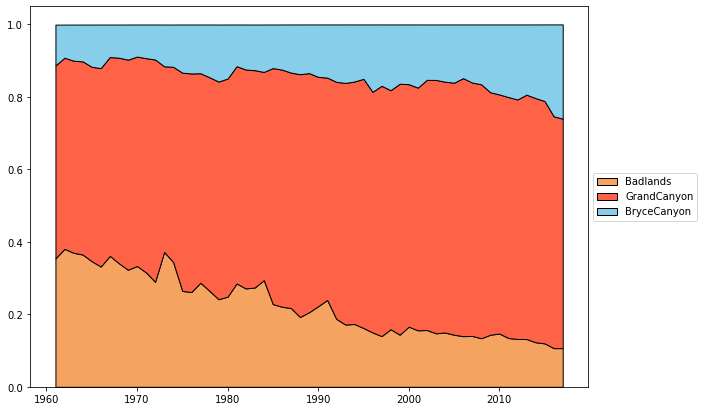

In [8]:
plt.figure(figsize=(10,7))

data_perc = np_data.divide(np_data.sum(axis=1), axis=0)

plt.stackplot(x,
              data_perc["Badlands"],data_perc["GrandCanyon"],data_perc["BryceCanyon"],
              edgecolor='black',
              colors=colors,
              labels=labels)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Stem Plot
    - Stemplot even takes negative values, so the difference is taken of data and is plotted over time.
    - When to use: It is similar to a stack plot but the difference helps in comparing the data points.

    - diff() is used to find the difference between previous data and is stored in another copy of the data. The first data point is NaN (Not a Number) as it doesn’t contain any previous data for calculating the difference.

In [9]:
np_stem= np_data.copy()

In [10]:
np_stem[['Badlands', 
         'GrandCanyon',
         'BryceCanyon']] = np_data[['Badlands', 
                                    'GrandCanyon',
                                    'BryceCanyon']].diff()

np_stem.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,NaN,NaN,NaN
1,1962,211500.0,194400.0,-13800.0
2,1963,29200.0,92100.0,38500.0
3,1964,5800.0,37100.0,10800.0
4,1965,11500.0,112600.0,66500.0


    - plt.stem() takes the 1st argument as numeric data i.e year and 2nd argument as numeric data of the National Park visitors.


/home/bit-data/anaconda3/envs/tsw_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/home/bit-data/anaconda3/envs/tsw_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/bit-data/anaconda3/envs/tsw_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be add

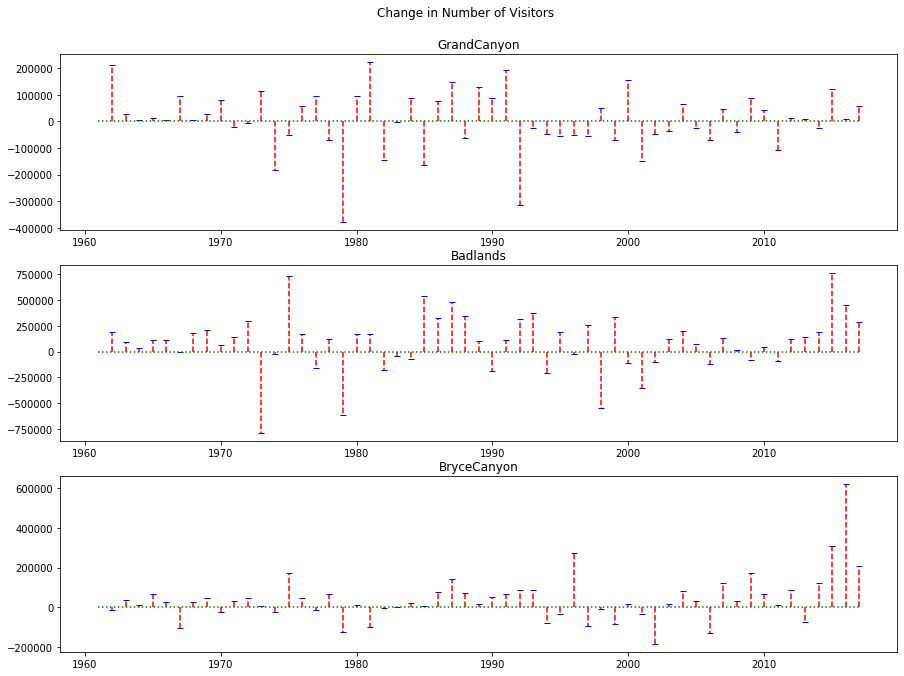

In [11]:
plt.figure(figsize=(15,11))

plt.suptitle('Change in Number of Visitors', y=0.94)

plt.subplot(311)
plt.stem(np_stem['Year'],
         np_stem['Badlands'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('GrandCanyon')

plt.subplot(312)
plt.stem(np_stem['Year'],
         np_stem['GrandCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('Badlands')

plt.subplot(313)
plt.stem(np_stem['Year'],
         np_stem['BryceCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('BryceCanyon')

plt.show()